In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [108]:
df = pd.read_csv("/home/amol/GITRepo/GL/Residency-4-UnsupervisedLer/Session-1/shopping_data.csv")

In [109]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [112]:
df= df.drop("Genre", axis =1)

In [113]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [114]:
def Agegroup(age) :        
    if ((age > 0) & (age <= 12)) :        
        return int(1)    
    elif ((age >13) & (age <= 19)) :        
        return int(2)
    elif ((age >=20) & (age <= 30)) :
        return int(3)
    elif ((age >30) & (age <= 40)) :
        return int(4)
    elif ((age >40) & (age <=55)) :
        return int(5)
    elif ((age >55) & (age <65)) :
        return int(6)
    elif ((age >65) & (age <90)) :
        return int(7)

In [115]:
df["AgeGroup"] = df["Age"].map(Agegroup)

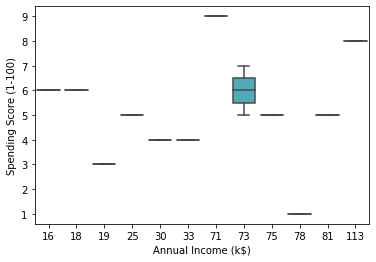

In [12]:
sns.boxplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df[df["Spending Score (1-100)"]<10])

In [116]:
df

,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,19,15,39,2.0
1,21,15,81,3.0
2,20,16,6,3.0
3,23,16,77,3.0
4,31,17,40,4.0
...,...,...,...,...
195,35,120,79,4.0
196,45,126,28,5.0
197,32,126,74,4.0
198,32,137,18,4.0


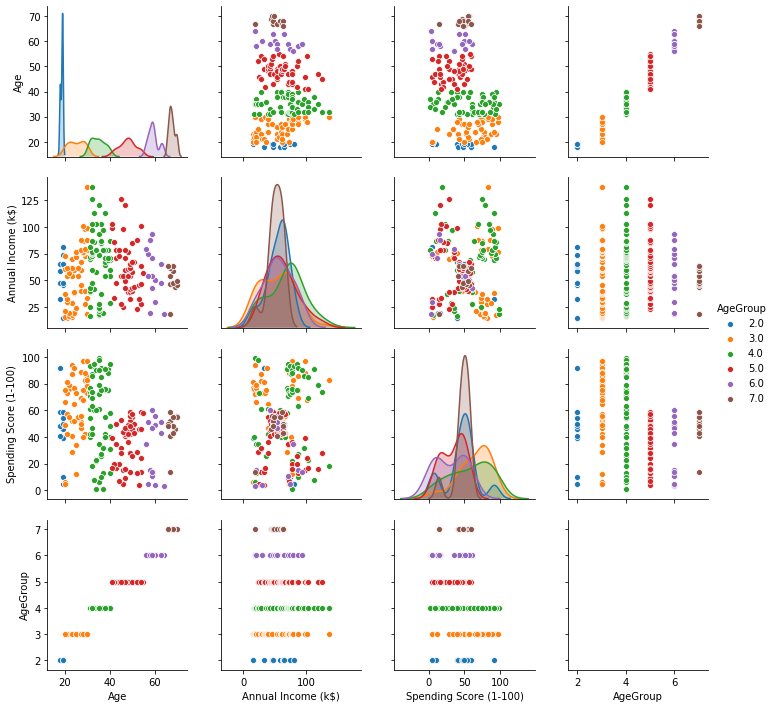

In [117]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue="AgeGroup")

In [118]:
import numpy as np

In [119]:
f1 = df['Annual Income (k$)'].values

f2 = df['Spending Score (1-100)'].values

X = np.array(list(zip(f1, f2)))

In [120]:
from sklearn.cluster import KMeans

In [125]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,183653.328947
1,3,106348.373062
2,4,73679.789039
3,5,44448.455448
4,6,37265.865205
5,7,30241.343618
6,8,25022.485005
7,9,22787.737044


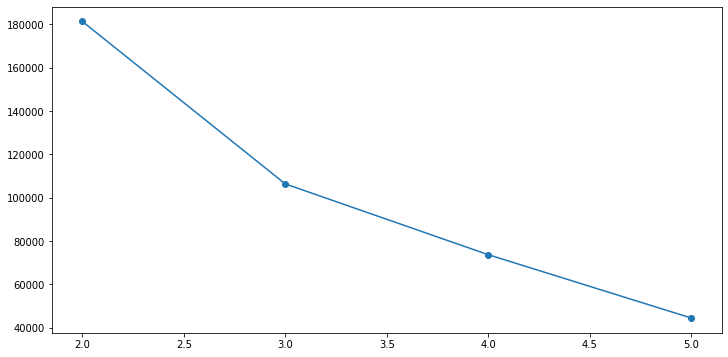

In [32]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [129]:
clusters = KMeans(5, n_init = 5)